In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
print (sys.path)
sys.path.append('../www')

['', '/Users/Garrett/anaconda2/lib/python27.zip', '/Users/Garrett/anaconda2/lib/python2.7', '/Users/Garrett/anaconda2/lib/python2.7/plat-darwin', '/Users/Garrett/anaconda2/lib/python2.7/plat-mac', '/Users/Garrett/anaconda2/lib/python2.7/plat-mac/lib-scriptpackages', '/Users/Garrett/anaconda2/lib/python2.7/lib-tk', '/Users/Garrett/anaconda2/lib/python2.7/lib-old', '/Users/Garrett/anaconda2/lib/python2.7/lib-dynload', '/Users/Garrett/anaconda2/lib/python2.7/site-packages', '/Users/Garrett/anaconda2/lib/python2.7/site-packages/Sphinx-1.5.1-py2.7.egg', '/Users/Garrett/anaconda2/lib/python2.7/site-packages/aeosa', '/Users/Garrett/anaconda2/lib/python2.7/site-packages/setuptools-27.2.0-py2.7.egg', '/Users/Garrett/anaconda2/lib/python2.7/site-packages/IPython/extensions', '/Users/Garrett/.ipython']


In [4]:
import requests
import pandas as pd
import ast
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Garrett/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['text', 'loads', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


##  Import data_exploration2.py
    1. Connect to UCSD VPN via UCSD Protected, https://vpn.ucsd.edu/+CSCOE+/logon.html, or AnyConnect.
    2. Import data_exploration2.py into notebook
    3. When prompted conda/pip install packages as needed
    4. Test functionality with the code below

In [59]:
from data_exploration2 import *

# Current API Methods

## 1. Correlation coefficient between 2 columns in a table.

In [42]:
col1 = 'numunits'
col2 = 'productid'
table1 = 'orderlines'
table2 = 'products'
key1 = 'productid'
key2 = 'productid'

col_pair = (col1,col2)
table_pair = (table1,table2)
key_pair = (key1,key2)

response=Stats('CORR',col_pair, table_pair, key_pair)

print("Correlation: ",response)

('Correlation: ', 0.00643616130791823)


## 2. Covariance coefficient between 2 columns in a table.

In [43]:
col1 = 'numunits'
col2 = 'productid'
table1 = 'orderlines'
table2 = 'products'
key1 = 'productid'
key2 = 'productid'

col_pair = (col1,col2)
table_pair = (table1,table2)
key_pair = (key1,key2)

response=Stats('covar_samp',col_pair, table_pair, key_pair)

print("Covariance: ",response)

('Covariance: ', 93.5788384664056)


## 3. Simple aggregates  between 2 columns in a table.

In [53]:
# select count(a.numorderlines), max(b.totalprice)
# from orders a, orderlines b
# where a.orderid = b.orderid
# group by a.numorderlines

response = Simpleagg(agg_func_pair=['COUNT','MAX'], col_pair=['numorderlines','numunits'],table_pair=['orders','orderlines'],
                 key_pair=['orderid','orderid'])

pd.DataFrame.from_records(response, columns=['Count','Max']).head(10)

,Count,Max
0,34,1
1,32,1
2,50,4
3,2128,55
4,612,15
5,116,9
6,139561,3000
7,1100,22
8,26,1
9,781,12


## 3. Simple Histogram

In [54]:
NIDS = getNodeIds(['Education & Reference'])

In [55]:
','.join([str(item['nodeID']) for item in NIDS])

'2732,11661,2737,11686,10020691011,3176,3564978011,8944243011,8944244011,3351944011,69802,69803,69804,15356861,69805,69806,69807,69808,69809,69810,3190,2917,2918,15356871,2919,2920,69281,2922,2923,2924,2925,2939,2940,2941,2942,2943,2944,2945,2946,2947,2948,2949,8951191011,2950,2955,2963,2965,3022,3188,3253,3254,3255,3256,3258,3260,171106,3189,3182,3183,3184,3185,3186,10166936011,3187,7009082011,3177,3178,16244021,3179,3180,7009139011,3206,3192,7009083011,3209,3210,3211,3212,3214,3215,3216,3217,3220,16244041,3221,3208,3261,3262,3263,8883929011,8883930011,3267,3270,3273,3274,16244061,3278,3279,3280,3283,3301,3200,3201,3203,3204,3344092011,10367686011,10367687011,10367688011,10367689011,10379660011,10367690011,17433,10367691011,10367692011,10367693011,10367694011,10367676011,10367695011,10367696011,10367697011,10367698011,10367699011,10367700011,10367701011,10367702011,171118,10367703011,10367704011,10367705011,10367706011,10367707011,10367708011,10367709011,10367710011,10367711011,103677

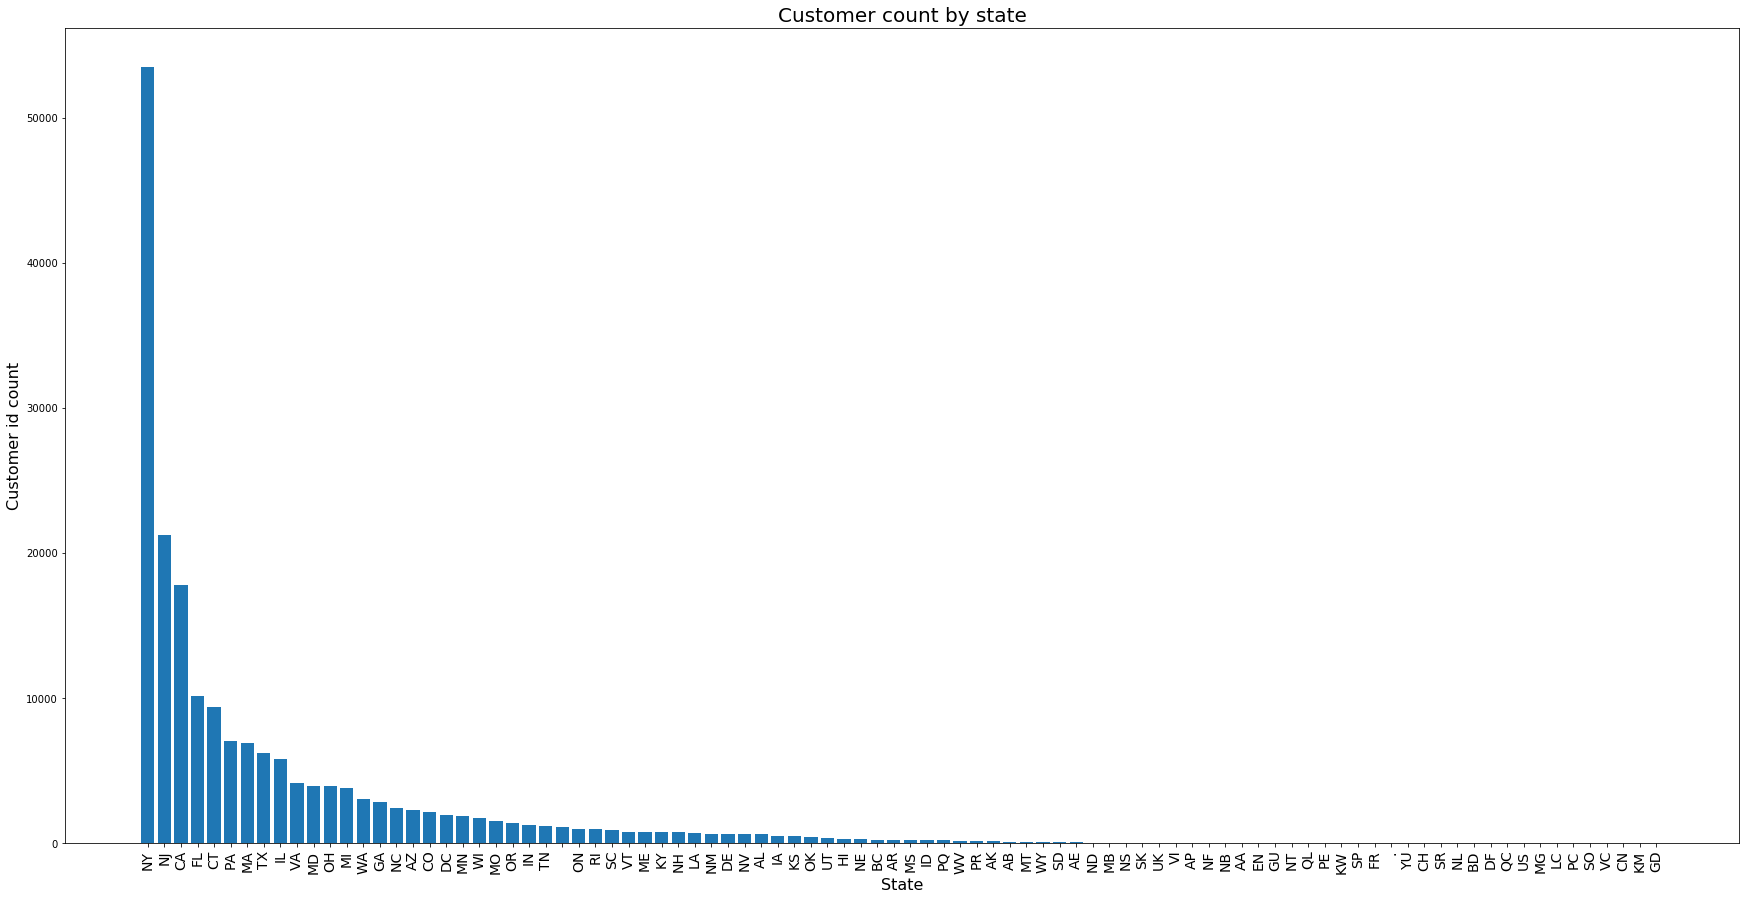

In [10]:
table = "orders"
groupby = 'state'
count = 'customerid'
response = Histogram(table, groupby, count)
data = ast.literal_eval(response)
df = pd.DataFrame(data)
x = np.array(range(len(df['Group'])))
y = np.array(df['Count'])
my_xticks = list(df['Group'])
plt.figure(figsize=[30,15])
plt.xticks(x, my_xticks, fontsize=14, rotation='vertical')
plt.bar(x, y)
plt.title('Customer count by state', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Customer id count', fontsize=16);


## 4. What are the top categories of books read in a particular month(s)?
    Sample Query: What are the top 3 categories of books that are most read around Christmas?
    
    @app.route("/api/Top_Categories/<num_categories>/<month>")

In [75]:
num_categories = 5
months = [12]
tc = OptimizedTopCategories(num_categories, months)
print(tc)

[('Education & Reference', 9689.0), ('Graphics & Design', 4070.0), ('Home Improvement & Design', 3916.0), ('Geography & Cultures', 3763.0), ('Animals', 3759.0)]


## 5. Generalized Query: What time of the year are the sales of  X category/ies of book the highest?
    Sample Query: What time of the year are the sales of “Education” books the highest?

    

In [76]:
list='Education & Reference'
category_list = list.split(",")

print("\nHighest Monthly Sales By Category: \n")

#hmsb = HighestMonthlySalesByCategory('Education & Reference')
limit = 5
hmsb = HighestMonthlySalesByCategory(category_list, 5)
print(hmsb)



Highest Monthly Sales By Category: 

[{"mon": 12, "num_sold": 9689}, {"mon": 11, "num_sold": 7096}, {"mon": 5, "num_sold": 4028}, {"mon": 6, "num_sold": 3715}, {"mon": 1, "num_sold": 3659}]


## 6. Sentiment polarity score for all reviews extracted for Solr datasource
    @app.route('/sentiment_polarity/<category>/<month>', methods=['GET'])

In [95]:
print("Sentiment Polarity: \n")
sr = Sales_Reviews('Education', 3) 
print (sr)

Sentiment Polarity: 

[]


## 7. Which book categories show a downward trend in demand in a particular month?
    Sample Query: Which book categories show a downward trend in demand in Winter and Spring?
    
    @app.route("/api/Downward_Sales/<season>")

In [92]:
j = Downware_Sales('spring')
# df = pd.DataFrame(j)
# df.set_index('category', inplace=True)
# df.head()
j

'[{"category": "2963", "SaleTrend": -364}, {"category": "8944264011", "SaleTrend": -257}, {"category": "8951153011", "SaleTrend": -153}, {"category": "8944258011", "SaleTrend": -130}, {"category": "1007", "SaleTrend": -116}, {"category": "3564986011", "SaleTrend": -86}, {"category": "3094", "SaleTrend": -78}, {"category": "2990", "SaleTrend": -74}, {"category": "8883833011", "SaleTrend": -70}, {"category": "8883963011", "SaleTrend": -68}, {"category": "16244061", "SaleTrend": -66}, {"category": "9432902011", "SaleTrend": -65}, {"category": "4263", "SaleTrend": -62}, {"category": "282838", "SaleTrend": -61}, {"category": "3167", "SaleTrend": -58}, {"category": "1002", "SaleTrend": -58}, {"category": "1", "SaleTrend": -55}, {"category": "3006821", "SaleTrend": -51}, {"category": "3527", "SaleTrend": -49}, {"category": "2796", "SaleTrend": -43}, {"category": "3185", "SaleTrend": -40}, {"category": "4278", "SaleTrend": -39}, {"category": "8883838011", "SaleTrend": -34}, {"category": "4272"

In [84]:
season = 'spring'
url = 'http://localhost/api/Downward_Sales/'+season
response = requests.get(url)
j = response.json()
df = pd.DataFrame(j)
df.set_index('category', inplace=True)
df.head()

ConnectionError: HTTPConnectionPool(host='localhost', port=80): Max retries exceeded with url: /api/Downward_Sales/spring (Caused by <class 'socket.error'>: [Errno 61] Connection refused)

## 8. Is there a category which performs poorly in a date range?
    Sample Query: Is there a category that we should discontinue stocking?

    @app.route("/api/Discontinue_Stocking/<threshold>/<startyear>/<endyear>")

In [ ]:
threshold = '5'
startyear = '2013'
endyear = '2014'
url = 'http://localhost/api/Discontinue_Stocking/'+threshold+'/'+startyear+'/'+endyear
response = requests.get(url)
response.text

In [ ]:
%%timeit

In [ ]:
','.join([str(x) for x in [1,2,3,4,5,6,7,8,9,10,11,12]])

In [ ]:
len(getCategories())

In [ ]:
ct = TopCategories(12, [1,2,3,4,5,6,7,8,9,10,11,12])

In [ ]:
ct

In [ ]:
getOptimizedCategories()

In [ ]:
[x[0] for x in tc[:50]]

In [ ]:
getNodeIds(["Women's Fiction"])

In [ ]:
sorted(tc.values())

In [ ]:
cats = getCategories()

In [ ]:
getTopCategories()

In [ ]:
OptimizedTopCategories(3, [5])

In [ ]:
getCategories()

In [ ]:
getTopCategories()